In [2]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline
import jellyfish

C:\Users\student10\Anaconda2\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [91]:
df = pd.read_csv("C:\GIT\Amlin\Privacy_Rights_Clearinghouse-Data-Breaches-Export.csv", dtype={'Location': str})

In [92]:
df1 = df['Location'].astype('str')
del df['Location']
df = df.join(df1)

In [196]:
df.shape

(5280, 11)

In [94]:
new_df = df['Date Made Public'].apply(lambda x: pd.Series(x.split(',')))
df2 = new_df.rename(columns={0: 'Date', 1 : 'Year'}).join(df.iloc[:, 1:])
df2.head()

,Date,Year,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,Information Source,Location
0,October 21,2009,Bullitt County Public Schools,DISC,EDU,676,676,A Bullitt County Public Schools \n ...,Dataloss DB,"Shepherdsville, Kentucky"
1,October 21,2009,Roane State Community College,PORT,EDU,"14,783","14,783",Roane State Community College \n ha...,Dataloss DB,"Harriman, Tennessee"
2,October 15,2009,Halifax Health,PORT,MED,"33,000","33,000",A laptop computer from a Halifax \n ...,Dataloss DB,"Daytona Beach, Florida"
3,October 4,2009,Suffolk Community College,DISC,EDU,300,300,Suffolk Community College has \n ag...,Dataloss DB,"Selden, New York"
4,September 28,2009,Penrose Hospital,PHYS,MED,175,175,Officials at Penrose Hospital bel...,Dataloss DB,"Colorado Springs, Colorado"


In [95]:
new_df2 = df['Location'].apply(lambda x: pd.Series(x.split(',')))
del new_df2[2]
df3 = df2.iloc[:, :8].join(new_df2.rename(columns={0: 'City', 1 : 'State'}))
df3.head()

,Date,Year,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,City,State
0,October 21,2009,Bullitt County Public Schools,DISC,EDU,676,676,A Bullitt County Public Schools \n ...,Shepherdsville,Kentucky
1,October 21,2009,Roane State Community College,PORT,EDU,"14,783","14,783",Roane State Community College \n ha...,Harriman,Tennessee
2,October 15,2009,Halifax Health,PORT,MED,"33,000","33,000",A laptop computer from a Halifax \n ...,Daytona Beach,Florida
3,October 4,2009,Suffolk Community College,DISC,EDU,300,300,Suffolk Community College has \n ag...,Selden,New York
4,September 28,2009,Penrose Hospital,PHYS,MED,175,175,Officials at Penrose Hospital bel...,Colorado Springs,Colorado


In [96]:
df = df3

In [162]:
df.head()

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
0,21,October,2009,Bullitt County Public Schools,Shepherdsville,Kentucky,DISC,EDU,676,676,A Bullitt County Public Schools \r\n ...
1,21,October,2009,Roane State Community College,Harriman,Tennessee,PORT,EDU,14783,14783,Roane State Community College \r\n ...
2,15,October,2009,Halifax Health,Daytona Beach,Florida,PORT,MED,33000,33000,A laptop computer from a Halifax \r\n ...
3,4,October,2009,Suffolk Community College,Selden,New York,DISC,EDU,300,300,Suffolk Community College has \r\n ...
4,28,September,2009,Penrose Hospital,Colorado Springs,Colorado,PHYS,MED,175,175,Officials at Penrose Hospital bel...


In [98]:
new_df3 = df['Date'].apply(lambda x: pd.Series(x.split(' ')))
new_df3 = new_df3.rename(columns={0: 'Month', 1: 'Day'})
cols = new_df3.columns.tolist()
cols = cols[-1:] + cols[:-1]
new_df3 = new_df3[cols]
new_df3
df4 = df.iloc[:, 1:].join(new_df3)
df4.head()

,Year,Company,Type of breach,Type of organization,Records Breached,Total Records,Description of incident,City,State,Day,Month
0,2009,Bullitt County Public Schools,DISC,EDU,676,676,A Bullitt County Public Schools \n ...,Shepherdsville,Kentucky,21,October
1,2009,Roane State Community College,PORT,EDU,"14,783","14,783",Roane State Community College \n ha...,Harriman,Tennessee,21,October
2,2009,Halifax Health,PORT,MED,"33,000","33,000",A laptop computer from a Halifax \n ...,Daytona Beach,Florida,15,October
3,2009,Suffolk Community College,DISC,EDU,300,300,Suffolk Community College has \n ag...,Selden,New York,4,October
4,2009,Penrose Hospital,PHYS,MED,175,175,Officials at Penrose Hospital bel...,Colorado Springs,Colorado,28,September


In [99]:
df = df4

In [100]:
df.isnull().any()

Year                       False
Company                    False
Type of breach             False
Type of organization       False
Records Breached           False
Total Records              False
Description of incident     True
City                       False
State                       True
Day                        False
Month                      False
dtype: bool

In [101]:
df = df.fillna('N/A')

In [171]:
df

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
0,21,October,2009,Bullitt County Public Schools,Shepherdsville,Kentucky,DISC,EDU,676,676,A Bullitt County Public Schools \r\n ...
1,21,October,2009,Roane State Community College,Harriman,Tennessee,PORT,EDU,14783,14783,Roane State Community College \r\n ...
2,15,October,2009,Halifax Health,Daytona Beach,Florida,PORT,MED,33000,33000,A laptop computer from a Halifax \r\n ...
3,4,October,2009,Suffolk Community College,Selden,New York,DISC,EDU,300,300,Suffolk Community College has \r\n ...
4,28,September,2009,Penrose Hospital,Colorado Springs,Colorado,PHYS,MED,175,175,Officials at Penrose Hospital bel...
5,23,September,2009,Eastern Kentucky University,Richmond,Kentucky,DISC,EDU,5045,5045,The names and Social Security \r\n ...
6,22,September,2009,Bernard Madoff Investors,Dallas,Texas,PORT,BSF,2246,2246,More than 2200 Bernard Madoff \r\n ...
7,22,September,2009,Sagebrush Medical Plaza/Kern Medical Center,Bakersfield,California,PHYS,MED,31000,31000,Thousands of patients at a Kern \r\n ...
8,21,September,2009,Rocky Mountain Bank,Pinedale,Wyoming,DISC,BSF,1325,1325,A customer of the Rocky Mountain \r\n ...
9,14,September,2009,University of Florida,Gainesville,Florida,DISC,EDU,25,25,In August the University's \r\n Pri...


In [15]:
#df.to_csv("C:\GIT\Amlin\clean_data2.csv", index=False)

In [103]:
df = pd.read_csv("C:\GIT\Amlin\clean_data3.csv")

In [104]:
df

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
0,21,October,2009,Bullitt County Public Schools,Shepherdsville,Kentucky,DISC,EDU,676,676,A Bullitt County Public Schools \r\n ...
1,21,October,2009,Roane State Community College,Harriman,Tennessee,PORT,EDU,14783,14783,Roane State Community College \r\n ...
2,15,October,2009,Halifax Health,Daytona Beach,Florida,PORT,MED,33000,33000,A laptop computer from a Halifax \r\n ...
3,4,October,2009,Suffolk Community College,Selden,New York,DISC,EDU,300,300,Suffolk Community College has \r\n ...
4,28,September,2009,Penrose Hospital,Colorado Springs,Colorado,PHYS,MED,175,175,Officials at Penrose Hospital bel...
5,23,September,2009,Eastern Kentucky University,Richmond,Kentucky,DISC,EDU,5045,5045,The names and Social Security \r\n ...
6,22,September,2009,Bernard Madoff Investors,Dallas,Texas,PORT,BSF,2246,2246,More than 2200 Bernard Madoff \r\n ...
7,22,September,2009,Sagebrush Medical Plaza/Kern Medical Center,Bakersfield,California,PHYS,MED,31000,31000,Thousands of patients at a Kern \r\n ...
8,21,September,2009,Rocky Mountain Bank,Pinedale,Wyoming,DISC,BSF,1325,1325,A customer of the Rocky Mountain \r\n ...
9,14,September,2009,University of Florida,Gainesville,Florida,DISC,EDU,25,25,In August the University's \r\n Pri...


In [18]:
df = df.fillna('N/a')

In [19]:
df2 = df[['Year', 'Total Records']]

In [20]:
df3 = df2.groupby(['Year']).sum()

In [21]:
df3

,Total Records
Year,
2005,52821610
2006,48607177
2007,130598248
2008,49740455
2009,218959724
2010,12861822
2011,66131642
2012,27776352
2013,57651691


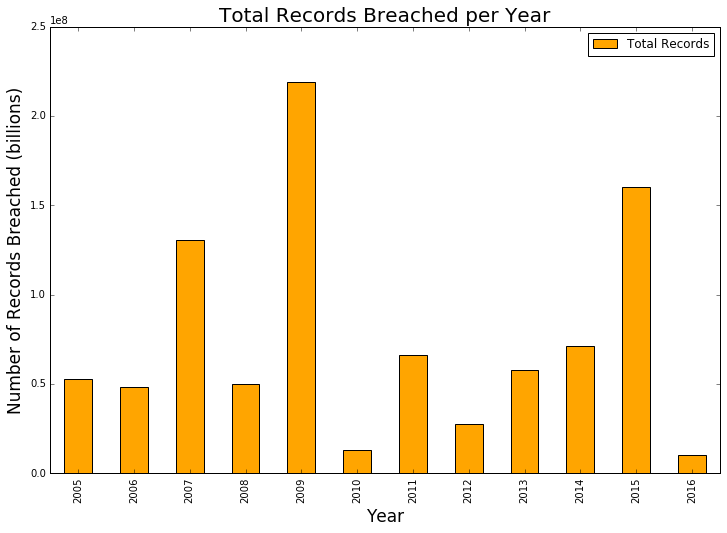

In [49]:
df3[:12].plot(kind='bar', fontsize=10, figsize=[12,8], color='orange')
plt.title('Total Records Breached per Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Records Breached (billions)', fontsize=17) 

In [23]:
df.head()

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
0,21,October,2009,Bullitt County Public Schools,Shepherdsville,Kentucky,DISC,EDU,676,676,A Bullitt County Public Schools \r\n ...
1,21,October,2009,Roane State Community College,Harriman,Tennessee,PORT,EDU,14783,14783,Roane State Community College \r\n ...
2,15,October,2009,Halifax Health,Daytona Beach,Florida,PORT,MED,33000,33000,A laptop computer from a Halifax \r\n ...
3,4,October,2009,Suffolk Community College,Selden,New York,DISC,EDU,300,300,Suffolk Community College has \r\n ...
4,28,September,2009,Penrose Hospital,Colorado Springs,Colorado,PHYS,MED,175,175,Officials at Penrose Hospital bel...


In [24]:
df4 = df[['State', 'Total Records']]

In [25]:
df4 = df4.groupby(['State']).sum()

In [26]:
df4.to_csv("C:\GIT\Amlin\states.csv")

In [27]:
df5 = df[['Year']]
df5['Count'] = 1

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
df5 = df5.groupby(['Year']).sum()

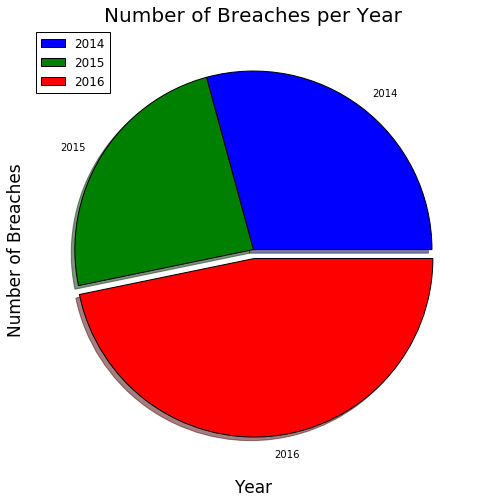

In [29]:
df5[9:12].plot(kind='pie', figsize=[8, 8], subplots=True, shadow=True, explode=[0,0,0.05])
plt.title('Number of Breaches per Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Breaches', fontsize=17)
plt.legend(loc='upper left')

In [30]:
df6 = df[['Year', 'Type of breach']]
df6[''] = 1
df6 = df6.groupby(['Year', 'Type of breach']).sum()
df6.head(20)

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Year Type of breach     
2005 DISC             20
     HACK             48
     INSD             10
     PHYS              8
     PORT             38
     STAT             10
     UNKN              2
2006 CARD              3
     DISC             83
     HACK             75
     INSD             32
     PHYS             39
     PORT            186
     STAT             48
     UNKN             16
2007 CARD              2
     DISC             98
     HACK             71
     INSD             23
     PHYS             43

In [31]:
df6 = df6.unstack()
#df6.set_index(['Year', 'Type of breach'])
#pd.set_option('display.multi_sparse', True)

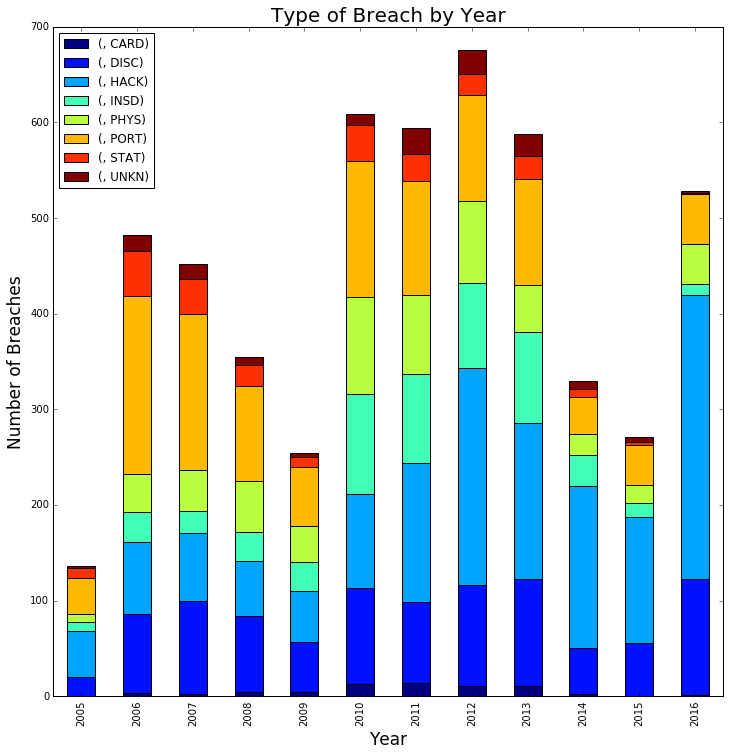

In [218]:
df6[:12].plot(kind='bar', stacked=True, figsize=[12,12], colormap = 'jet')
plt.title('Type of Breach by Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Breaches', fontsize=17) 
plt.legend(loc='upper left')

In [33]:
df7 = df[['Month']]
df7['Count'] = 1
df7 = df7.groupby(['Month']).sum().sort_values('Count', ascending=False)
df7.to_csv("C:\GIT\Amlin\months.csv")
df7.head()

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Count
Month,
March,481
January,460
May,460
December,459
July,452


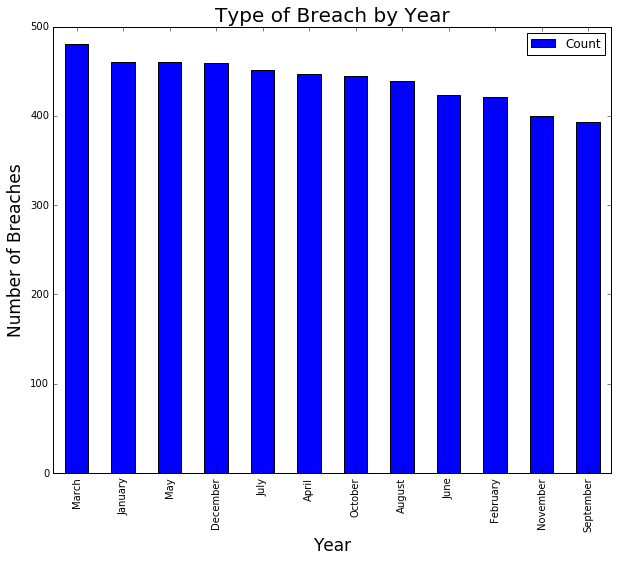

In [71]:
df7.plot(kind='bar', stacked=True, figsize=[10,8])
plt.title('Type of Breach by Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Breaches', fontsize=17) 
plt.legend(loc='upper right')

In [35]:
df8 = df[['Type of organization', 'Type of breach']]
df8['Count'] = 1
g = df8.groupby(['Type of organization', 'Type of breach']).sum()
g.to_csv("C:\GIT\Amlin\organisation_breach.csv")

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [36]:
df9 = df[['State']]
df9['Count'] = 1
df9 = df9.groupby('State').sum()

C:\Users\student10\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
df9.to_csv("C:\GIT\Amlin\state_count.csv")

In [115]:
df10 = df['Year'].value_counts().to_frame()
df10

,Year
2012,676
2010,609
2011,594
2013,588
2016,528
2006,482
2007,452
2008,355
2014,330
2015,271


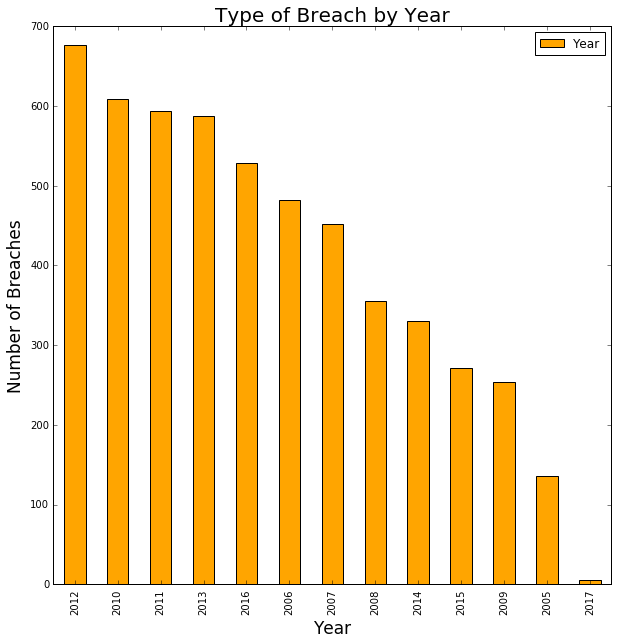

In [116]:
df10.plot(kind='bar', figsize=[10,10], color='orange')
plt.title('Type of Breach by Year', fontsize=20) 
plt.xlabel('Year', fontsize=17) 
plt.ylabel('Number of Breaches', fontsize=17) 
plt.legend(loc='upper right')

In [54]:
df10.to_csv('C:/GIT/Amlin/breaches_year.csv')

In [174]:
df11 = df.loc[df['Type of breach'] == 'HACK']
del df11['Records Breached']

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
13,21,August,2009,University of Massachusetts,Amherst,Massachusetts,HACK,EDU,0,0,Nearly a year ago hackers broke \r\n ...
25,18,June,2009,Suncoast Schools Federal Credit Union,Tampa,Florida,HACK,BSF,56000\r\r,56000,Some members of Suncoast Schools ...
47,9,April,2009,Penn State Erie/Behrend College,Erie,Pennsylvania,HACK,EDU,10868,10868,On March 23 the University confirmed \r\n ...
59,17,March,2009,Penn State Office of Physical Plant,University Park,Pennsylvania,HACK,EDU,1000,1000,The Social Security numbers of \r\n e...
74,19,February,2009,University of Florida,Gainesville,Florida,HACK,EDU,97200,97200,A foreign hacker gained access to \r\n ...
79,9,February,2009,Federal Aviation Administration,Washington,District Of Columbia,HACK,GOV,43000\r\r\n Total increased to 48000,48000,Hackers broke into the Federal Aviation \r\n ...
81,8,February,2009,Kaspersky,Woburn,Massachusetts,HACK,BSO,0,0,An unidentified hacker gained \r\n ...
85,3,February,2009,SRA International,Fairfax,Virginia,HACK,BSO,0,0,Malicious software may have allowed \r\n ...
105,11,January,2009,University of Rochester,Rochester,New York,HACK,EDU,450,450,Personal information including \r\n ...
117,15,December,2008,University of North Carolina,Greensboro,North Carolina,HACK,EDU,0,0,A breach of the accounting computer \r\n ...


In [135]:
#df11.to_csv('C:/GIT/Amlin/hacks.csv')

In [172]:
df11_c = df11['Records Breached'].to_frame()

In [173]:
from sklearn import preprocessing

for f in df11_c.columns:
    if df11_c[f].dtype == 'object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df11_c[f].values))
        df11_c[f] = lbl.transform(list(df11_c[f].values))

Records Breached


In [182]:
df11_c.columns = ['Breached Records']

In [183]:
df12 = pd.concat([df11, df11_c], axis=1)

In [194]:
df11.sort_values('Records Breached', ascending=False)

,Day,Month,Year,Company,City,State,Type of breach,Type of organization,Records Breached,Total Records,Description of incident
1322,28,April,2005,Georgia Southern University,Stateboro,Georgia,HACK,EDU,tens of \r\r\n thousands (at least ...,20000,Hackers accessed a University server which con...
5108,22,September,2016,Yahoo,Sunnyvale,California,HACK,BSO,Up to 500 million users,0,"""Yahoo is poised to confirm a massive data bre..."
4971,17,June,2016,Bizmatics Inc.,San Jose,California,HACK,MED,Up to 177000 (this number was increased as a r...,0,"""A healthcare provider in Colorado Vincent Vei..."
3615,1,April,2013,Tennis Express American Express,Houston,Texas,HACK,BSR,Unkown,0,A hacker or hackers accessed Tennis Expresses ...
3642,2,May,2013,Reputations.com,Redwood,California,HACK,BSO,Unknowm,0,Reputation.com experienced a hack that exposed...
5258,4,January,2016,Salem Five Cents Savings Bank,Salem,Massachusetts,HACK,BSF,Three occasions reported for this bank totalin...,315,Electronic breach affecting credit/debit cards...
4411,13,November,2014,U.S. Weather System,Washington,District Of Columbia,HACK,GOV,Satellite systems that forecast weather,0,Officials from the National Oceanic and Atmosp...
4650,30,November,2015,VTech,Arlington Heights,Illinois,HACK,BSO,Profiles of 2.2 million parents and 2.9 millio...,0,VTech a Hong Kong based company notified custo...
5211,18,November,2016,Michigan State University,East Lansing,Michigan,HACK,EDU,Potentially 400000,449,"""Michigan State University is confirming that ..."
5020,30,July,2016,Disney Consumer Products and Interactive Media,Burbank,California,HACK,BSO,Potentially 365000 registered users,0,"""Disney Consumer Products and Interactive Medi..."
